# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Problem statement:
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

#### Objectives
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? 

4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [11]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [5]:
# load the dataset
df=pd.read_csv('abtest.csv')
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Displaying the first few rows of the dataset

In [6]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


The dataset has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the information collected from each unique user who participated the experiment.

#### Displaying the last few rows of the dataset

In [7]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [1]:
# view the shape of the dataset
df.shape

NameError: name 'df' is not defined

The dataset has 100 rows and 6 columns.

#### Checking the data types of the columns for the dataset


In [23]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* All the columns have 100 observations.
* There are 4 object type columns and 2 numerical columns. The numerical columns are `user_id` and `time_spent_on_the_page`.

#### Getting the statistical summary for the numerical variables

In [141]:
# Get the numerical summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* The 'user_id' is a column consisting of unique user-ids.
* The difference in terms of time spent on the page ranges from 0.19-10.71 minutes, with average around 5.38 minutes and a standard deviation of 2.38 minutes.
* The median time spent on the page is 5.42 minutes.

#### Check for missing values

In [12]:
# checking for missing values
df.isna().sum()   

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset.

#### Check for duplicates

In [13]:
# Checking for duplicate entries in the data
df.duplicated().sum()

0

There are no duplicated entries in the dataset.

### Univariate Analysis

#### User ID

In [25]:
# check the unique values
df['user_id'].nunique()  

100

100 unique users participated in the experiment. 'user_id' is just an identifier for the users.

#### Time spent on the page

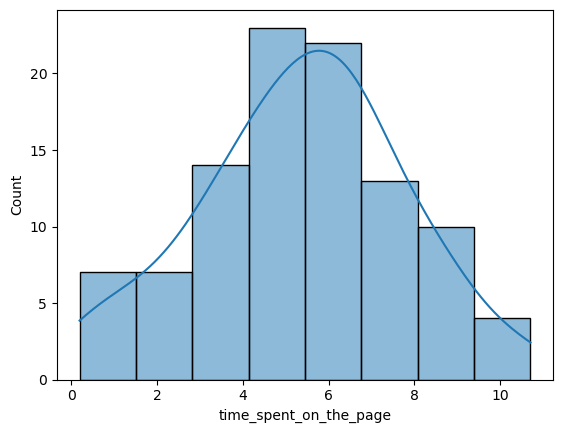

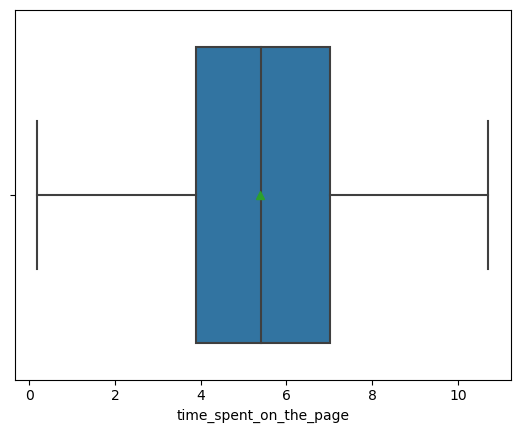

In [143]:
# Create a histogram and boxplot for time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page', showmeans=True)
plt.show()

* The average time spent on the page is almost the same as median time spent, indicating that the data is evenly distributed around the center point, which is around 5.40 minutes.
* There are multiple modes in this data range from 4-7 minutes.
* There are no outliers in this variable.
* Based on the distribution, we can assume that this variable is approximated to normal distribution.

#### Group

In [21]:
# check the unique values
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

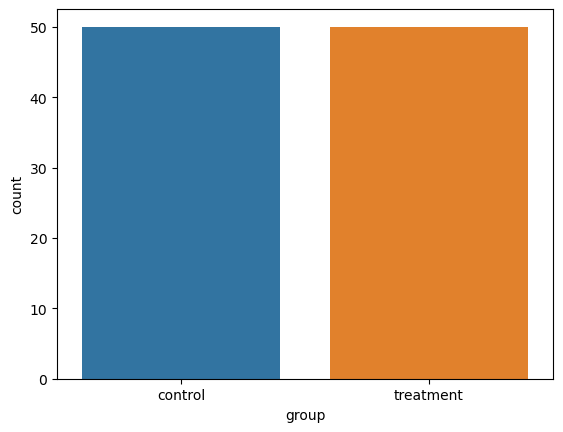

In [22]:
# create a count plot for 'group'
sns.countplot(data=df,x='group')
plt.show()

* The 'group' column consists of 2 unique categorical values - control and treatment.
* The distribution shows that the number of users in each group are the same, which is 50.

#### Landing page

In [28]:
# check the unique values
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

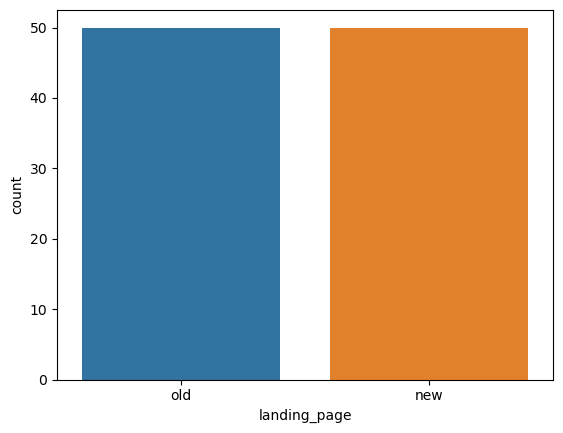

In [29]:
# create a count plot for 'landing_page'
sns.countplot(data=df,x='landing_page')
plt.show()

* Same as the 'group' column, the 'landing page' column consists of 2 unique categorical values - old and new.
* The distribution shows that number of users in each group are the same, which is 50.

#### Converted

In [27]:
# check the unique values
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

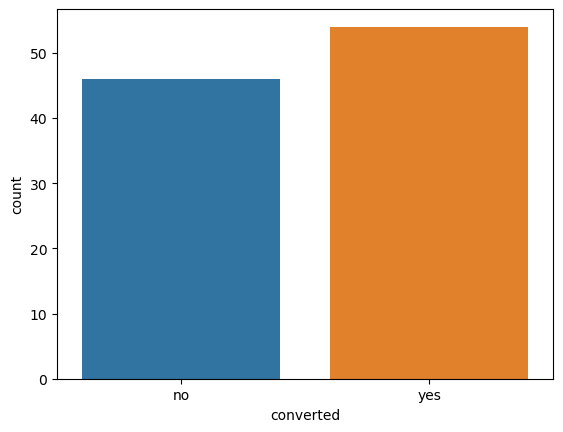

In [30]:
# create a count plot for 'converted'
sns.countplot(data=df,x='converted')
plt.show()

* The 'converted' column consists of 2 unique categorical values - no and yes.
* The distribution shows that there are more converted users than not converted users. 

#### Language preferred

In [31]:
# check the unique values
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

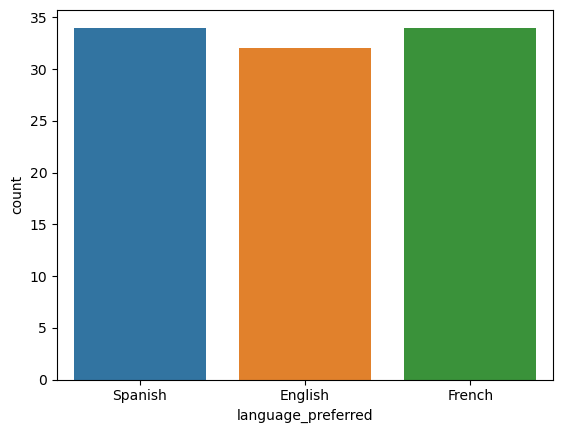

In [33]:
# create a count plot for 'language_preferred'
sns.countplot(data=df,x='language_preferred')
plt.show()

* The 'language_preferred' column consists of 3 unique categorical values - Spanish, English and French.
* The distribution shows that Spanish and French are equally preferred by users followed closely by English.

### Bivariate Analysis

#### Landing page vs Time spent on the page

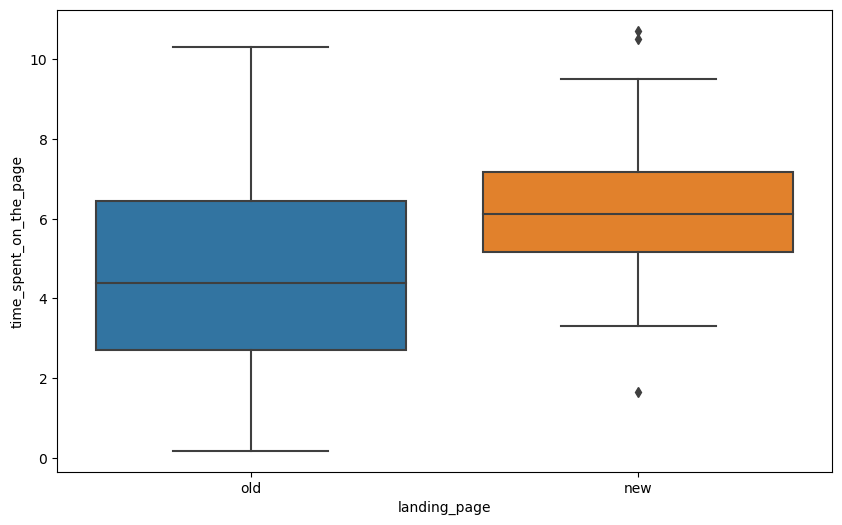

In [34]:
# Create a boxplot to understand the relationship between 'landing_page' and 'time_spent_on_the_page' columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page', by='time_spent_on_the_page')
plt.show()

The median time spent on the new landing page is higher than the existing page.

#### Conversion status vs Time spent on the page

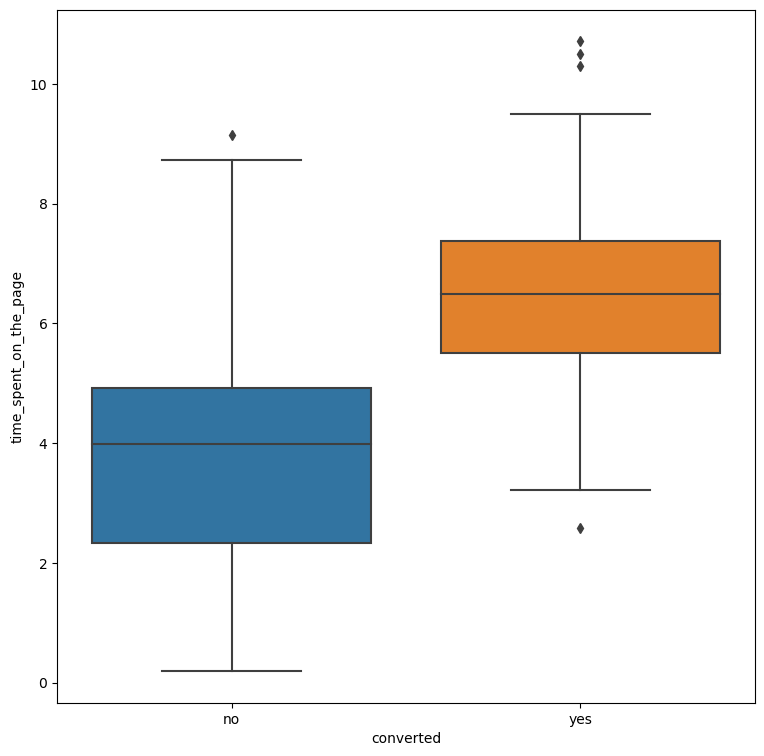

In [42]:
# Create a boxplot to understand the relationship between 'converted' and 'time_spent_on_the_page' column
splt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ='converted', y = 'time_spent_on_the_page')
plt.show()

The median time spent on the landing pages is much higher for converted users compare to not converted. 

#### Language preferred vs Time spent on the page

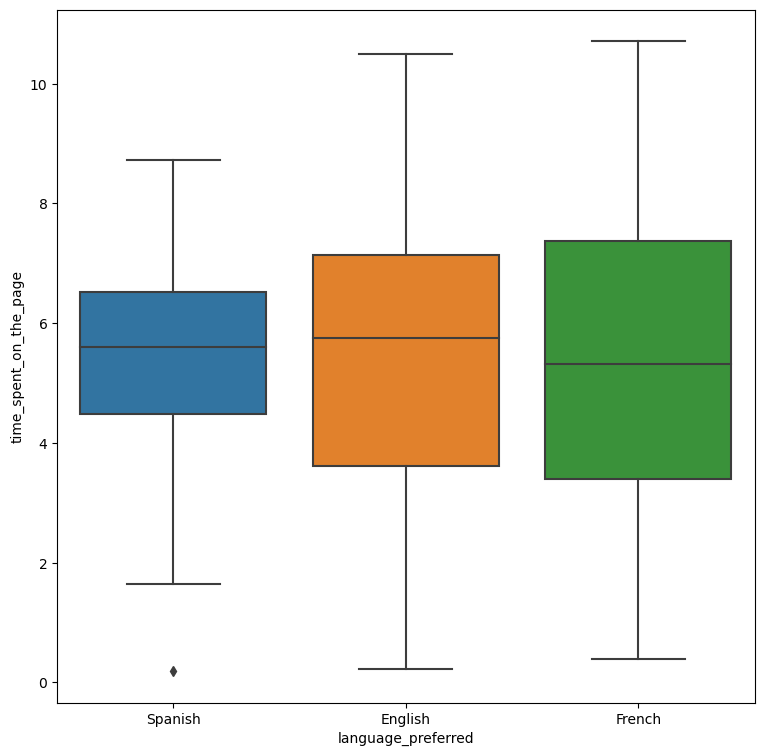

In [131]:
# Create a boxplot to understand the relationship between 'language_preferred' and 'time_spent_on_the_page' column
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ='language_preferred', y ='time_spent_on_the_page')
plt.show()

The median time spent on the page seems to be very close for all three preferred languages, but the variation is lower in time spent on the page by users who preferred Spanish compared to English and French.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

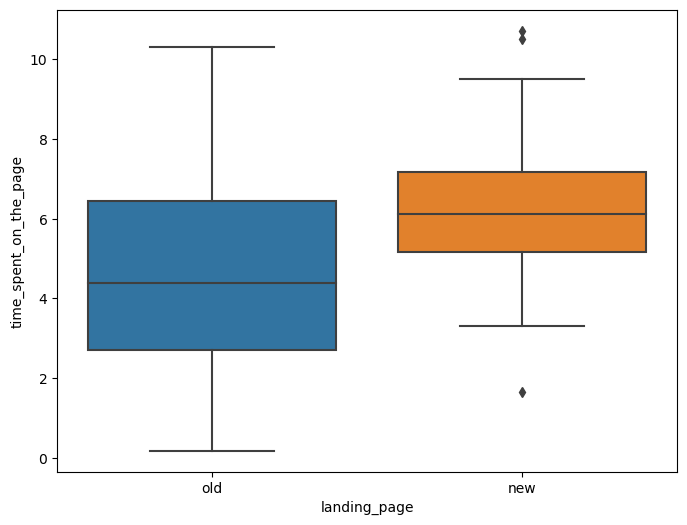

In [47]:
# visual analysis of the time spent on the new page and the time spent on the existing page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

* Based on the sample data, users on average spent more time on the new landing page compare to the existing page.
* Is the observed difference in time spent on new and existing page significant enough to conclude the same about the populations? To determine this, we will test the difference using a statistical test.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$, $\mu_2$ be the mean time spent on the new and existing landing pages respectively.

We will test the null hypothesis
>$H_0: \mu_1 = \mu_2$<br>

against the alternate hypothesis
>$H_a: \mu_1>\mu_2$


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we will use two sample t-test for this problem.

In a two sample t-test we test for equality of two population means.

We are provided that the data is continuous, the samples are randomly selected, and we assume that they are from normally distributed populations. 

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [50]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for existing landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [109]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [67]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative ='greater')  

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [57]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

We do have enough evidence to support the claim that users spend more time on the new landing page compare to the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis


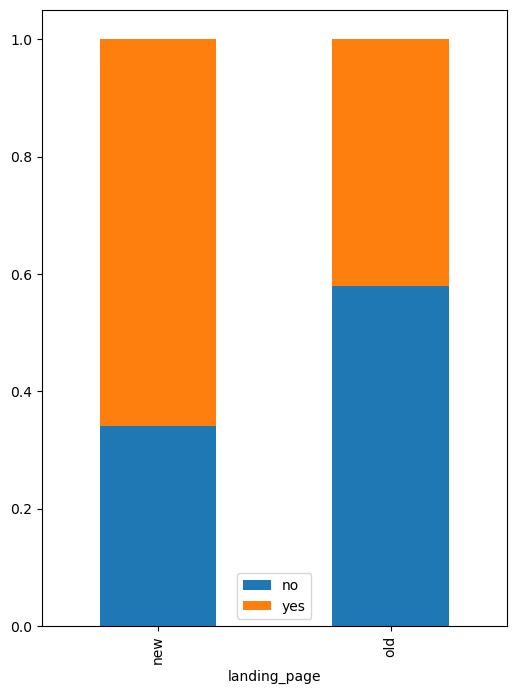

In [58]:
# Create a stacked bar chart to visually compare the conversion rate for the new page and the conversion rate for the existing page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

* The proportion of converted users is higher for the new landing page than the existing landing page. 
* Is this difference significant enough to conclude that the conversion rate for the new page is greater than the existing page? 

### Step 1: Define the null and alternate hypotheses


Let $p_1$, $p_2$ be the proportions of converted users who visit the new and existing landing pages  respectively.

We will test the null hypothesis
>$H_0: p_1 = p_2$<br>

against the alternate hypothesis
>$H_a: p_1>p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, we will use two proportion z-test for this problem.


### Step 3: Decide the significance level


As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [150]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of converted users in the treatment and control groups are {0} and {1} respectively'.format(new_converted, old_converted ))
print('The numbers of users served the new and existing pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users in the treatment and control groups are 33 and 21 respectively
The numbers of users served the new and existing pages are 50 and 50 respectively


### Let's test whether the Z-test assumptions are satisfied or not

We are provided that the samples are independent, and we assume that the populations are approximated to normal distribution. This can be checked whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 500\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 5: Calculate the p-value

In [69]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest 

# calculate the p-value
test_stat, p_value =proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger') 

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [70]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference


We do have enough evidence to support the claim that the conversion rate for the new page is greater than the existing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

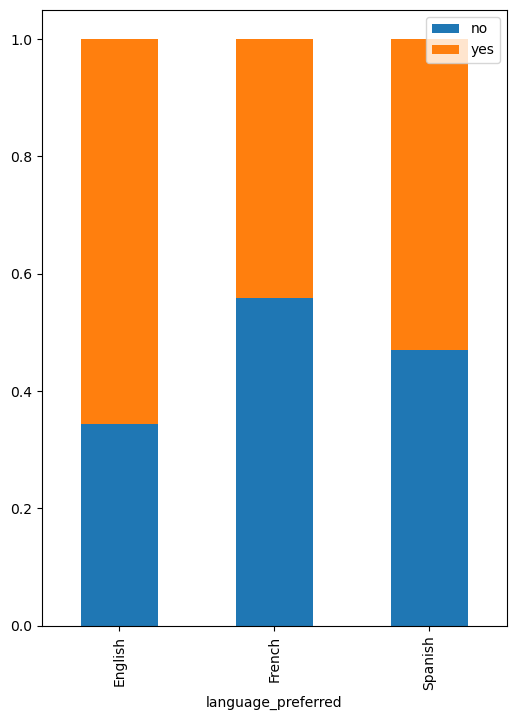

In [73]:
# Create a stacked bar chart to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'], normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

* Conversion is the highest in users who preferred English, followed by Spanish and French respectively. 
* Based on the sample data, we can infer that conversion is different among the three preferred languages by users, but is this difference significant enough to conclude that conversion is dependent on preferred language?

### Step 1: Define the null and alternate hypotheses


$H_0:$ The conversation status and preferred language are independent of each other

$H_a:$ The conversion status depends on preferred language

### Step 2: Select Appropriate test


This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, we will use the Chi-square test.

The chi-square test is to compare what we observe in the random sample (n>5) to what we expect to observe when we assume that there is no relationship between the two variables.

### Step 3: Decide the significance level


As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [79]:
contingency_table=pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value


In [103]:
# import the required function
from scipy.stats import chi2_contingency

#find the p-value
chi_2, p_value, dof, expected=chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [104]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference


We do not have enough statistical significance to conclude that the user conversion status depends on preferred language. 

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [86]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [89]:
# calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

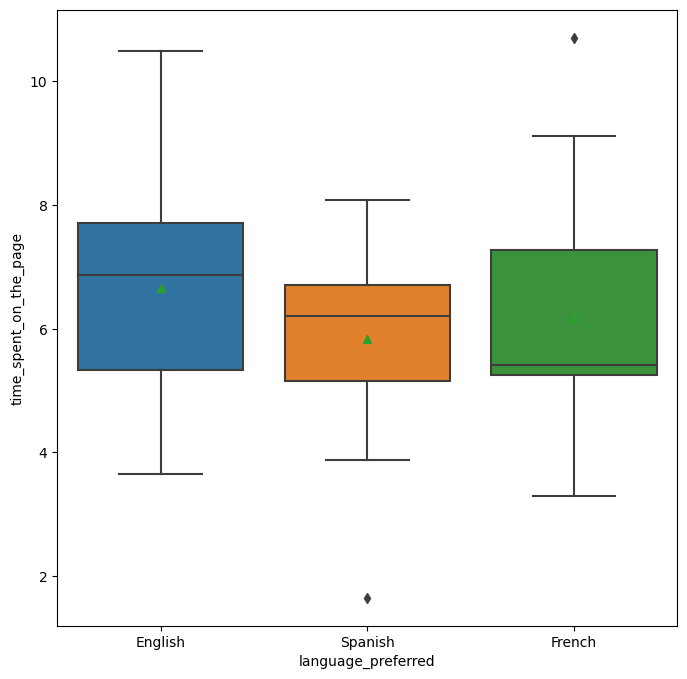

In [87]:
# create a boxplot to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x ='language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


* English preferred users spent the longest mean time on the new page, followed by French and Spanish preferred users respectively.
* Is the observed difference in time spent on page among the three preferred languages significant enough to conclude the same about the populations? To determine this, we will test the difference using a statistical test.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$,$\mu_2$, $\mu_3$ be the mean time spent on the new page for English,
French, and Spanish preferred users respectively.

We will test the null hypothesis 

> $H_0 :\mu_1=\mu_2=\mu_3.$ <br>

against the alternative hypothesis
> $H_a$ : At least one of the mean time spent on the new page is different for the different language users.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. Based on this information, we will use one-way ANOVA test provided normality and equality of variance assumptions are verified.

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new page does not not follow a normal distribution

In [99]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [100]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


We do not have enough evidence to reject the null hypothesis that the response follows the normal distribution. 

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [106]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [108]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


We do not have enough statistic evidence to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [92]:
# create a subsetted data frame of the time spent on the new page by English, French and Spanish as preferred language respectively 
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']  

### Step 5: Calculate the p-value


In [96]:
# import the required function
from scipy.stats import f_oneway

# perform one_way anova test
test_Stat, p_value=f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [97]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference


We do not have enough statistical evidence to say that at least one of the mean time spent on the new page with respect to the three preferred languages is different. 

## Conclusion and Business Recommendations

* Based on the sample data, the average time spent on the landing page is 5.38 minutes.
* Users spent more time on the new landing page compare to the existing landing page.
* The conversion rate for the new page is greater than the existing page.
* The conversion status does not depend on the preferred language.
* The mean time spent on the new page is the same for users of different languages.
* In order to expand its business by acquiring new subscribers. The ENews_Express should replace the existing page with the new landing page.
* The size of the sample can be increased to make the conclusion from the statistical test more reliable.